In [ ]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from datetime import date

In [ ]:
# importing drive by mounting from google colab.
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the dataset by following the above stepes.
# using head fuction for showing top 15 rows and columns
loan_approvel = "/content/drive/MyDrive/loan_sanction_test.csv"
df = pd.read_csv(loan_approvel)
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [ ]:
df.shape

(367, 12)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df.isnull().sum().sum()

84

In [ ]:
# In our dataset we can see the creadit_history is in integer.
# Now i will create a new column which is status
df['status'] = df['Credit_History'].apply(lambda x: 'Approved' if x==1 else 'Rejected')

In [ ]:
# as i added a new column now check its shape again6764
df.shape

(367, 13)

In [ ]:
# checking null values in the dataset
df.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


<Axes: >

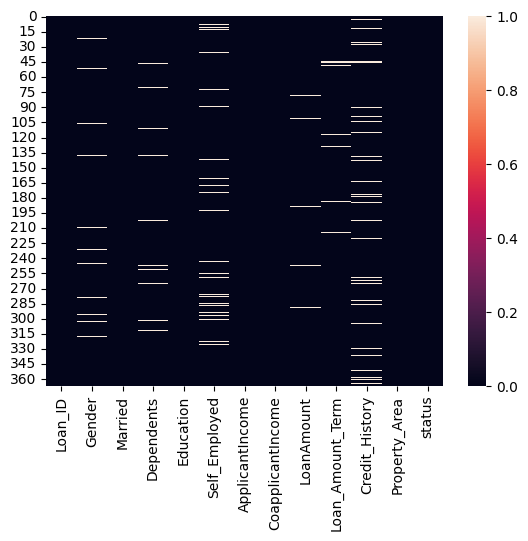

In [ ]:
#creating a heatmap for better understaning of null values
sns.heatmap(df.isnull())

In [ ]:
# before handing null values lets checks its dtype
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,int64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
df['Gender'].mode()

,Gender
0,Male


In [ ]:
 df['Gender'].replace(np.nan,'Male',inplace=True)
df['Gender'].isnull().sum()

<ipython-input-15-9ae18dc1e884>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(np.nan,'Male',inplace=True)


0

In [ ]:
df['Dependents'].mode()

df['Dependents'].replace(np.nan,"0",inplace=True)
df['Dependents'].isnull().sum()

<ipython-input-16-86272768c731>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace(np.nan,"0",inplace=True)


0

In [ ]:
df['Self_Employed'].mode()

,Self_Employed
0,No


In [ ]:

df['Self_Employed'].replace(np.nan,"No",inplace = True)
df['Self_Employed'].isnull().sum()

<ipython-input-18-ad582175d956>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].replace(np.nan,"No",inplace = True)


0

In [ ]:
df['LoanAmount'].median()

125.0

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

<ipython-input-20-2da661834cad>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)


In [ ]:
df['Credit_History'].median()

1.0

In [ ]:
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)

<ipython-input-22-f643238cc010>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)


In [ ]:

median_loan_term = df['Loan_Amount_Term'].median()
median_loan_term

360.0

In [ ]:

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(median_loan_term).astype(float)

<Axes: >

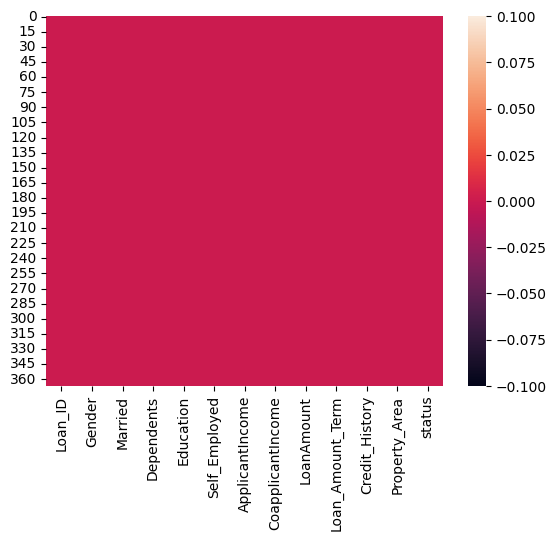

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
# Data is clear now lets find outliers
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_income = df[(df['ApplicantIncome'] < lower_bound) | (df['ApplicantIncome'] > upper_bound)]
print('count of outlier in Applicantincome :' ,len(outlier_income))

count of outlier in Applicantincome : 32


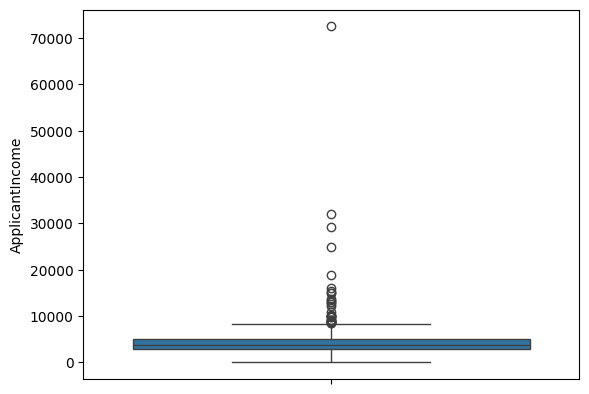

In [ ]:

sns.boxplot(df['ApplicantIncome'])
plt.show()

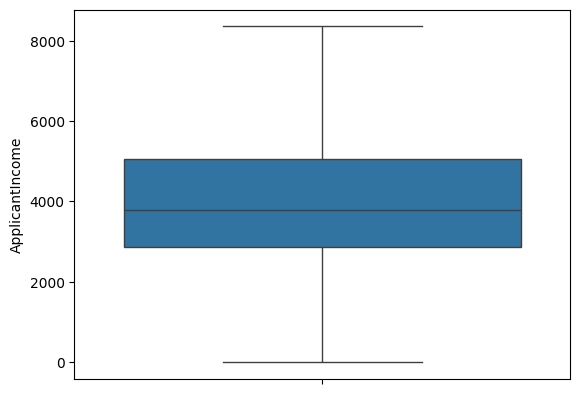

In [ ]:
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] < lower_bound, lower_bound, df['ApplicantIncome'])
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] > upper_bound, upper_bound, df['ApplicantIncome'])

sns.boxplot(df['ApplicantIncome'])
plt.show()

In [ ]:

Q1 =  df['CoapplicantIncome'].quantile(0.25)
Q3 =  df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_coappliaction = df[(df['CoapplicantIncome'] < lower_bound) | (df['CoapplicantIncome'] > upper_bound)]
print('count of outlier in CoapplicantIncome:', len(outlier_coappliaction))

count of outlier in CoapplicantIncome: 0


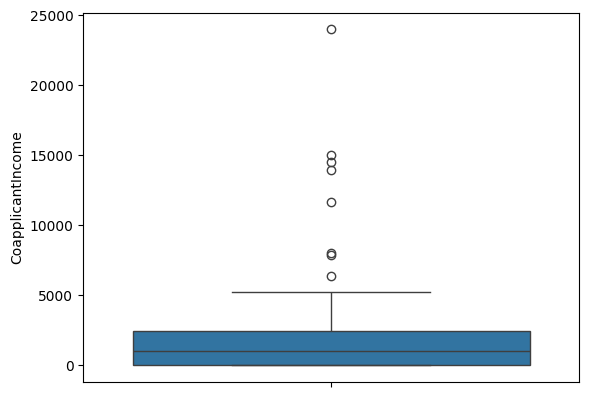

In [ ]:
sns.boxplot(df['CoapplicantIncome'])
plt.show()

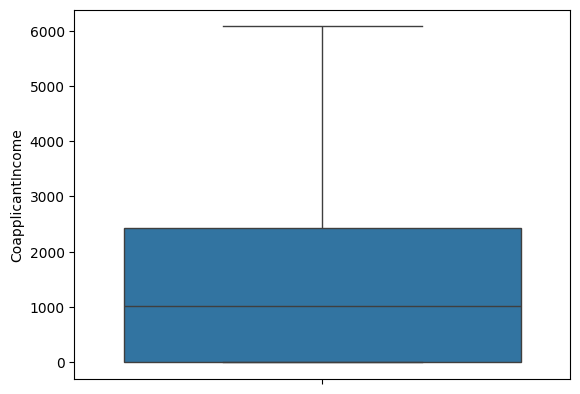

In [ ]:
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] < lower_bound, lower_bound, df['CoapplicantIncome'])
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] > upper_bound, upper_bound, df['CoapplicantIncome'])
sns.boxplot(df['CoapplicantIncome'])
plt.show()

In [ ]:
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_loanamount = df[(df['LoanAmount'] < lower_bound) | (df['LoanAmount'] > upper_bound)]
print('count of outliers in LoanAmount:', len(outlier_loanamount))

count of outliers in LoanAmount: 18


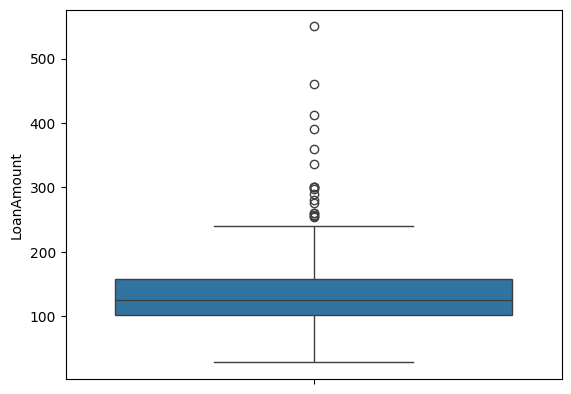

In [ ]:
sns.boxplot(df['LoanAmount'])
plt.show()

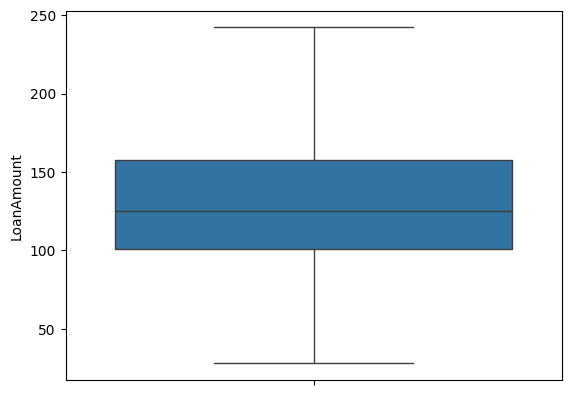

In [ ]:
df['LoanAmount'] = np.where(df['LoanAmount'] < lower_bound, lower_bound, df['LoanAmount'])
df['LoanAmount'] = np.where(df['LoanAmount'] > upper_bound, upper_bound, df['LoanAmount'])
sns.boxplot(df['LoanAmount'])
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

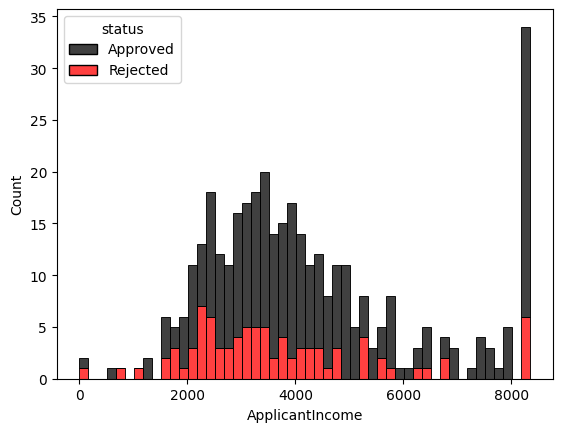

In [ ]:
# distributing the numeric coloumn by using histplot
sns.histplot(
    data=df,
    x='ApplicantIncome',
    hue='status',
    multiple='stack',
    bins=50,  # Replace binwidth with an integer for the number of bins
    palette={'Approved': 'black', 'Rejected': 'red'}
)

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

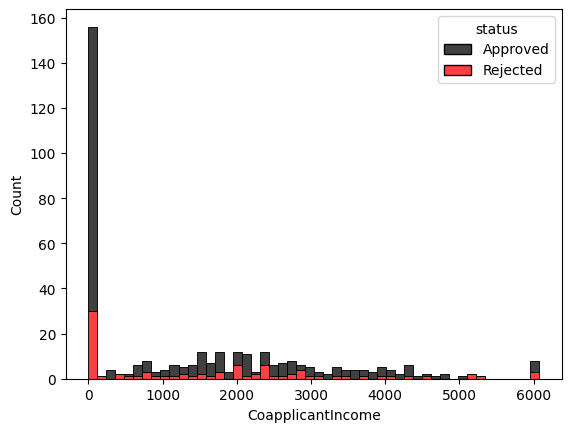

In [ ]:
sns.histplot(
    data=df,
    x='CoapplicantIncome',
    hue='status',
    multiple='stack',
    bins=50,  # Replace binwidth with an integer for the number of bins
    palette={'Approved': 'black', 'Rejected': 'red'}
)

<Axes: xlabel='LoanAmount', ylabel='Count'>

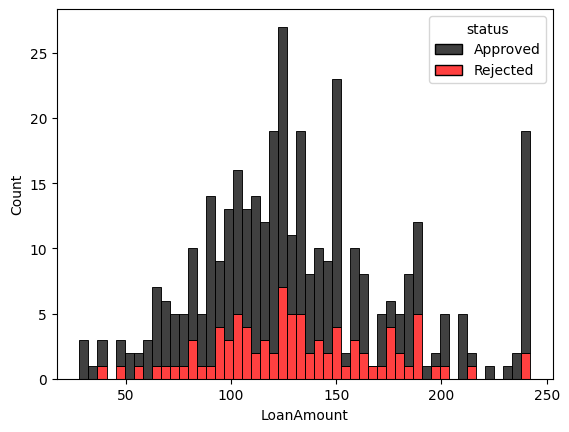

In [ ]:
sns.histplot(
    data=df,
    x='LoanAmount',
    hue='status',
    multiple='stack',
    bins=50,  # Replace binwidth with an integer for the number of bins
    palette={'Approved': 'black', 'Rejected': 'red'}
)

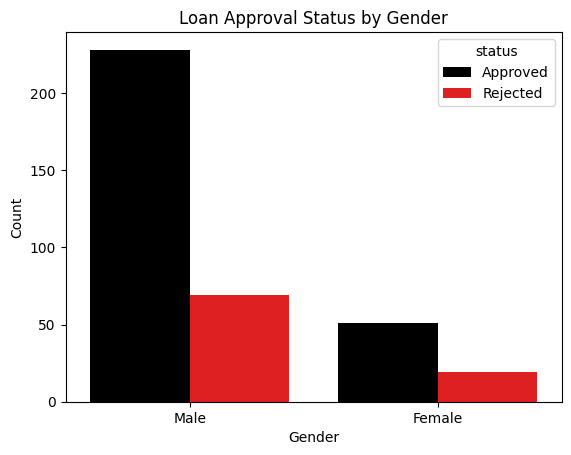

In [ ]:
sns.countplot(
    data=df,
    x='Gender',
    hue='status',
    palette={'Approved': 'black', 'Rejected': 'red'}
)

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Loan Approval Status by Gender") # title
plt.show()

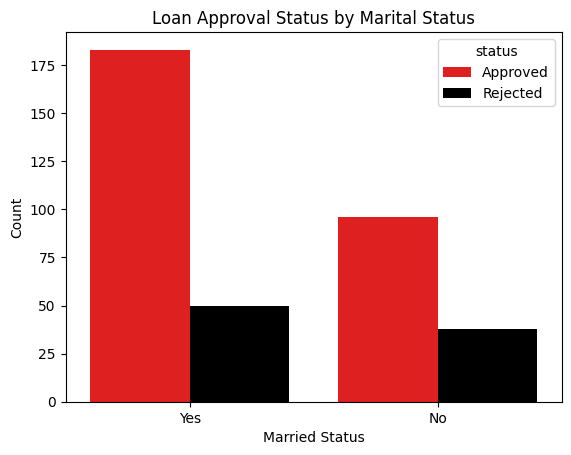

In [ ]:
sns.countplot(
    data=df,
    x='Married',
    hue='status',
    palette={'Approved': 'red', 'Rejected': 'black'}
)

plt.xlabel("Married Status")
plt.ylabel("Count")
plt.title("Loan Approval Status by Marital Status") # title
plt.show()

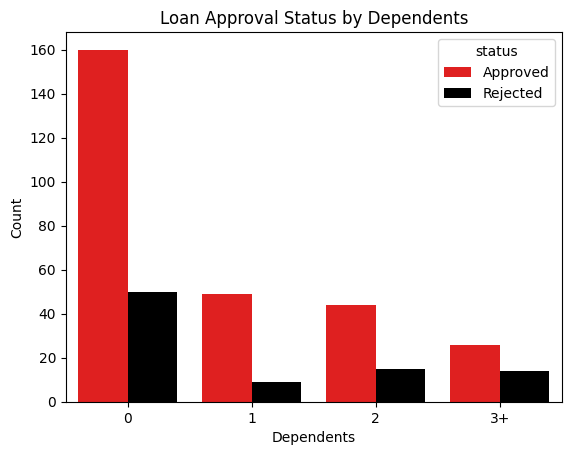

In [ ]:
sns.countplot(
    data=df,
    x='Dependents',
    hue='status',
    palette={'Approved': 'red', 'Rejected': 'black'}
)

plt.xlabel("Dependents")
plt.ylabel("Count")
plt.title("Loan Approval Status by Dependents") # title
plt.show()

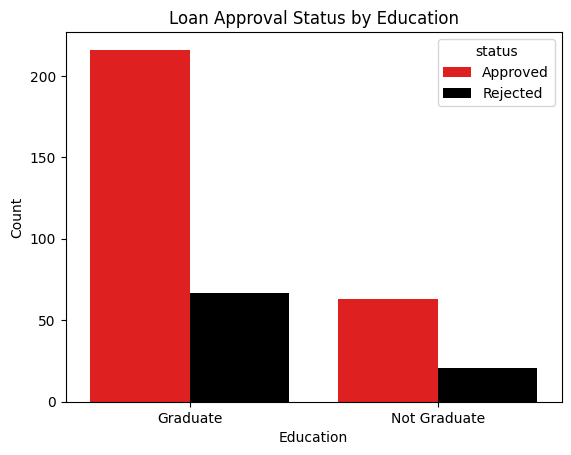

In [ ]:
sns.countplot(
    data=df,
    x='Education',
    hue='status',
    palette={'Approved': 'red', 'Rejected': 'black'}
)

plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Loan Approval Status by Education") # title
plt.show()

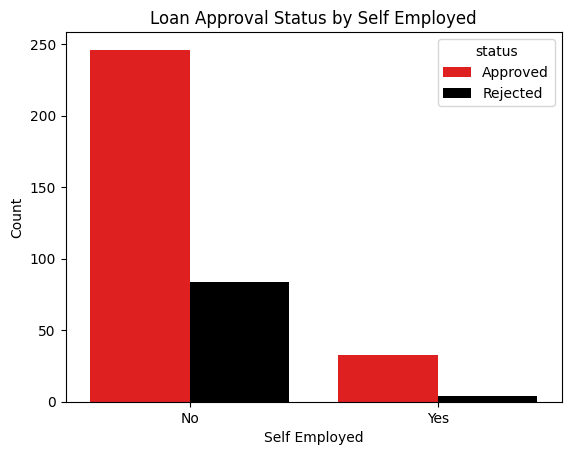

In [ ]:
sns.countplot(
    data=df,
    x='Self_Employed',
    hue='status',
    palette={'Approved': 'red', 'Rejected': 'black'}
)

plt.xlabel("Self Employed")
plt.ylabel("Count")
plt.title("Loan Approval Status by Self Employed") # title
plt.show()

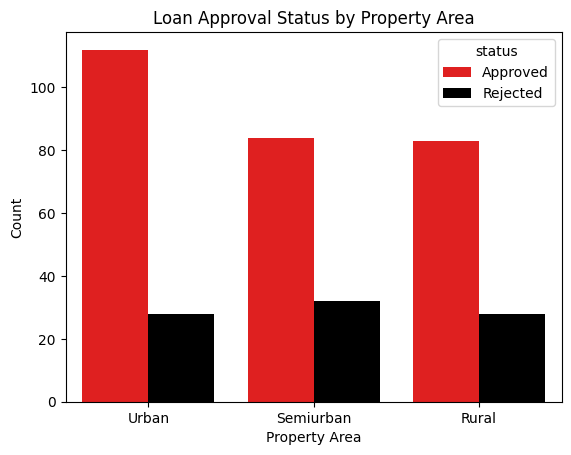

In [ ]:
sns.countplot(
    data=df,
    x='Property_Area',
    hue='status',
    palette={'Approved': 'red', 'Rejected': 'black'}
)

plt.xlabel("Property Area")
plt.ylabel("Count")
plt.title("Loan Approval Status by Property Area") # title
plt.show()

<ipython-input-55-42d2a9d085c2>:31: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


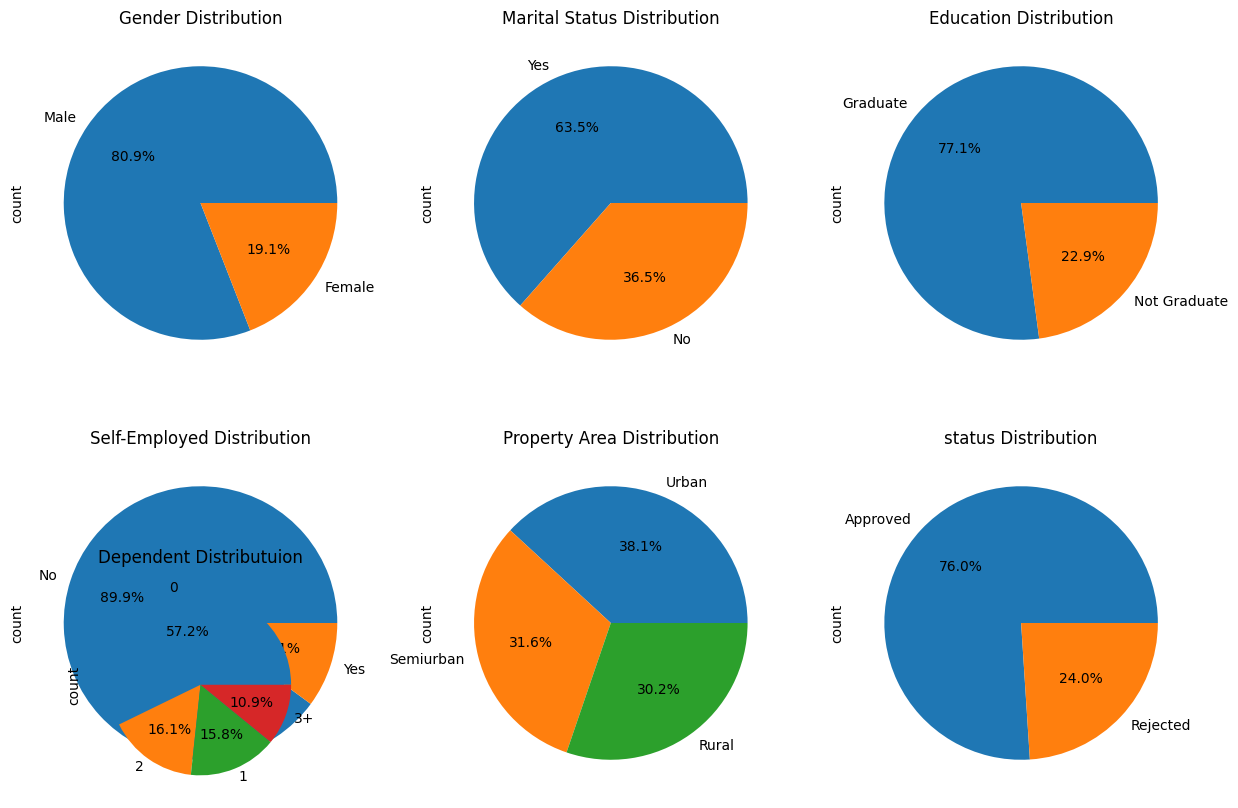

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')

plt.subplot(2, 3, 2)
df['Married'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Marital Status Distribution')

plt.subplot(2, 3, 3)
df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Education Distribution')

plt.subplot(2, 3, 4)
df['Self_Employed'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Self-Employed Distribution')

plt.subplot(2, 3, 5)
df['Property_Area'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Property Area Distribution')

plt.subplot(2, 3, 6)
df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('status Distribution')

plt.subplot(3, 3, 7)
df['Dependents'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Dependent Distributuion')

plt.tight_layout()
plt.show()

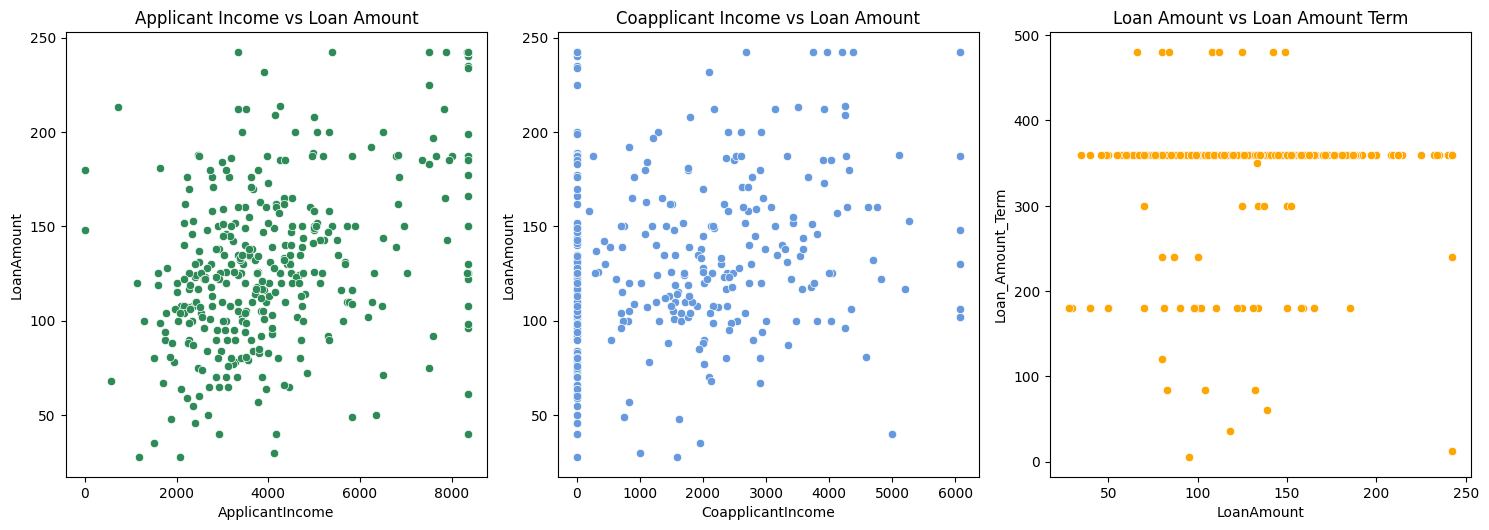

In [ ]:
# Plotting Scatter Plots for Numerical variables

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', color = 'seagreen', data=df)
plt.title('Applicant Income vs Loan Amount')

plt.subplot(2, 3, 2)
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', color = '#69d', data=df)
plt.title('Coapplicant Income vs Loan Amount')

plt.subplot(2, 3, 3)
sns.scatterplot(x='LoanAmount', y='Loan_Amount_Term', color = 'orange', data=df)
plt.title('Loan Amount vs Loan Amount Term')

plt.tight_layout()
plt.show()

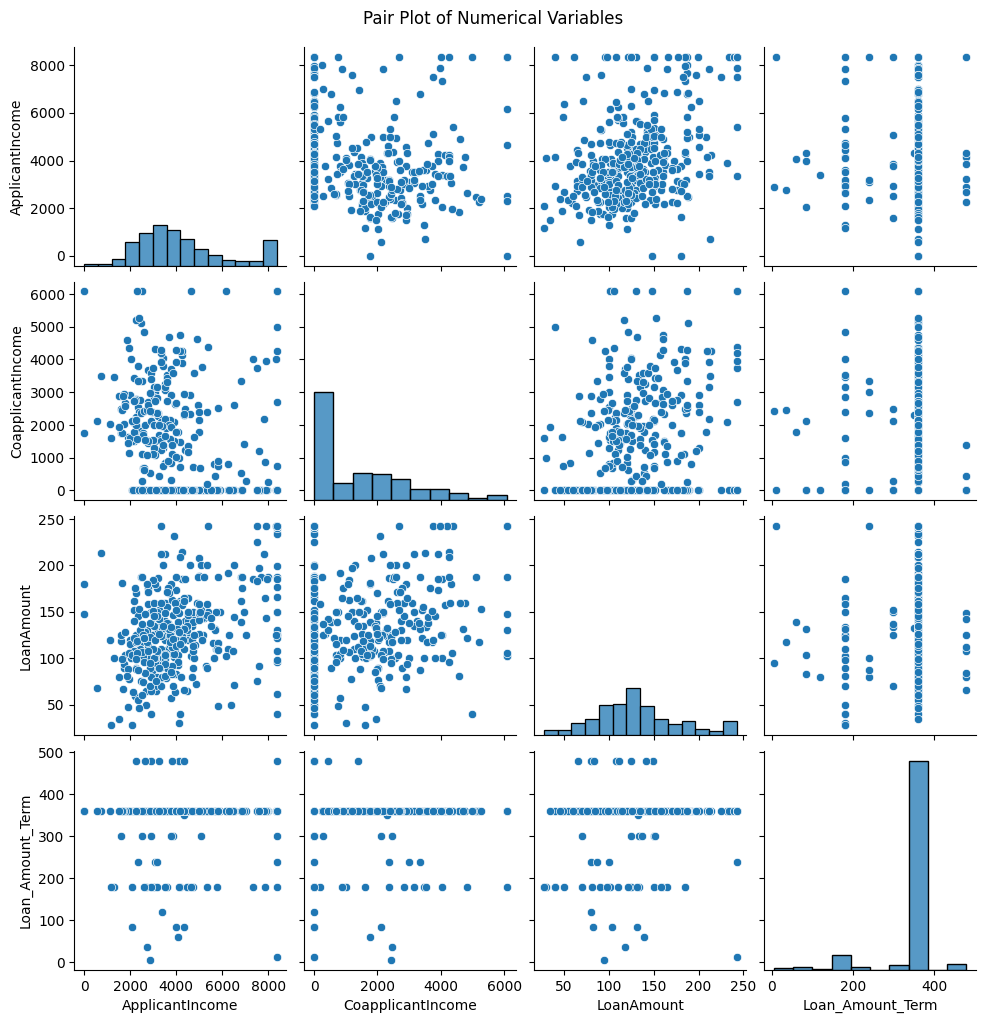

In [ ]:

sns.pairplot(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

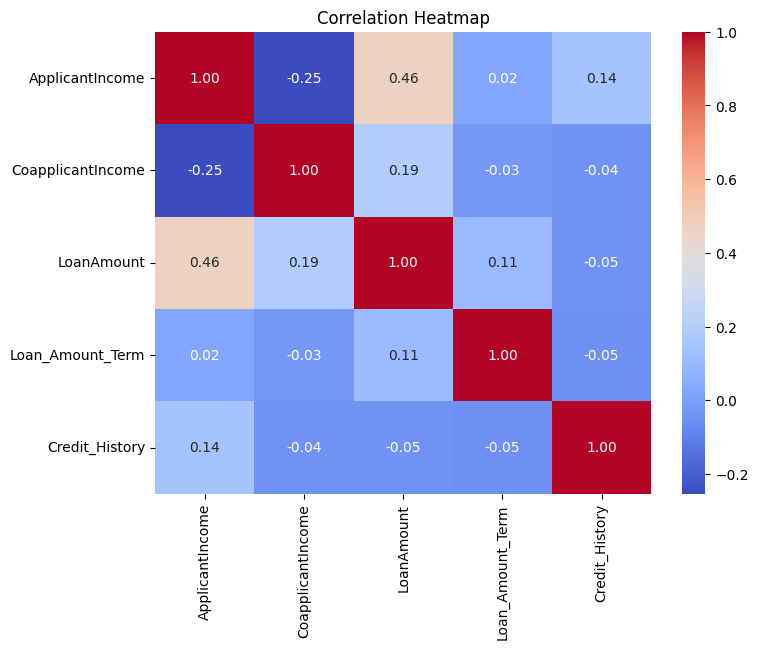

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

# Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

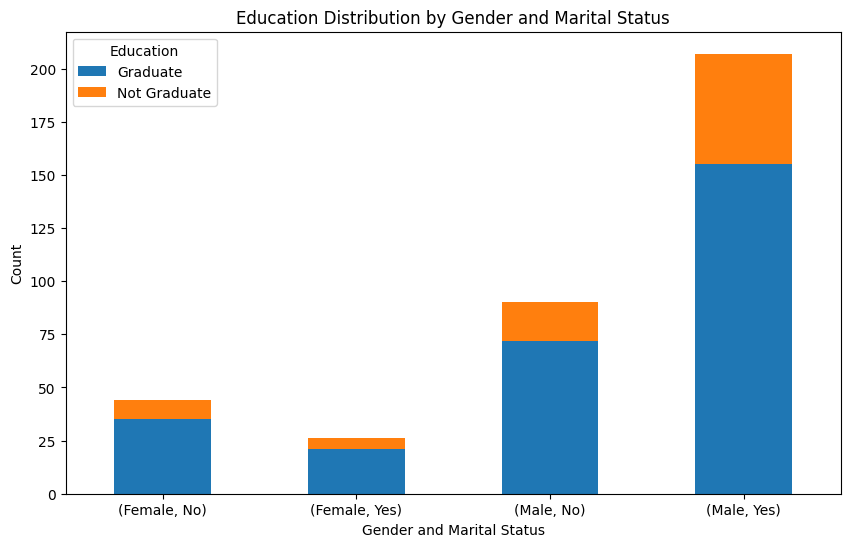

In [ ]:
grouped_data = df.groupby(['Gender', 'Married', 'Education'])['Education'].count().unstack()

# Ploting the stacked bar chart

grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Education Distribution by Gender and Marital Status')
plt.xlabel('Gender and Marital Status')
plt.ylabel('Count')
plt.legend(title='Education')
plt.xticks(rotation=0)
plt.show()